# Spotify_Similar_Song_Recommendation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("C:\Ankur\Frankfurt\Classes\Introduction to Data Analytics in Business\Project\spotify.data.csv")

In [6]:
data.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


##Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# MinMax Scaler

Data Scaling is a data preprocessing step for numerical features. In MinMax Scaler the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler_data = MinMaxScaler()

In [10]:
df = data.drop(columns = ["Unnamed: 0","song_title","artist","target"])

In [11]:
df1 = df.iloc[:,:]

In [12]:
df1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [13]:
scaler_df1 = scaler_data.fit_transform(df1)

In [14]:
scaler_df1

array([[0.01024843, 0.82482599, 0.19073524, ..., 0.59603317, 0.75      ,
        0.26243209],
       [0.19999772, 0.72041763, 0.3144808 , ..., 0.6544742 , 0.75      ,
        0.57793565],
       [0.03457011, 0.83062645, 0.17162409, ..., 0.158539  , 0.75      ,
        0.14437944],
       ...,
       [0.00861024, 0.5974478 , 0.19336526, ..., 0.59614981, 0.75      ,
        0.45465942],
       [0.00164539, 0.50464037, 0.17151585, ..., 0.59573575, 0.75      ,
        0.61450063],
       [0.00282127, 0.37587007, 0.19065432, ..., 0.82902165, 0.75      ,
        0.38361889]])

In [15]:
df_final = pd.DataFrame(scaler_df1,columns = df1.columns)

In [16]:
df_final

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.181818,0.153862,0.741141,1.0,0.514441,0.596033,0.75,0.262432
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.090909,0.124395,0.692162,1.0,0.071005,0.654474,0.75,0.577936
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.181818,0.147548,0.791369,1.0,0.335351,0.158539,0.75,0.144379
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.454545,0.077247,0.544709,1.0,0.003784,0.225162,0.75,0.203928
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.454545,0.442223,0.654132,0.0,0.058393,0.735659,0.75,0.908065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.090909,0.115976,0.902592,1.0,0.390844,0.158142,0.75,0.184079
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.090909,0.035782,0.928149,1.0,0.136083,0.362636,0.75,0.869411
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.000000,0.205430,0.934126,1.0,0.105814,0.596150,0.75,0.454659
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.090909,0.076300,0.925953,1.0,0.138605,0.595736,0.75,0.614501


# Feature Selection with Pearson’s Correlation

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

<AxesSubplot:>

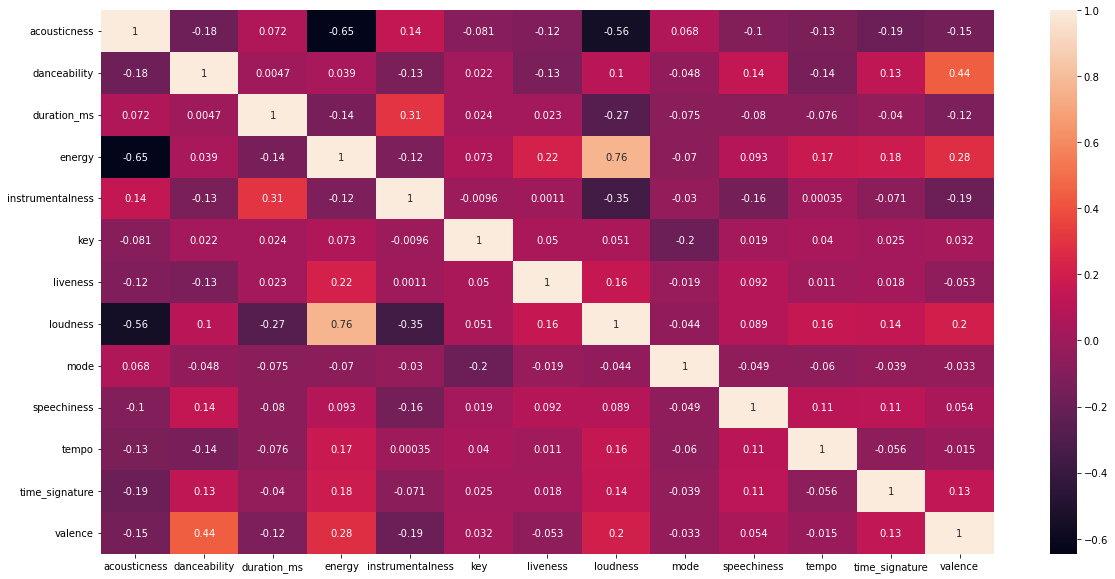

In [17]:
# plot correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_final.corr(), annot = True)

In [18]:
df_final.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [19]:
df1 = df_final.drop(columns = ['energy','loudness','valence','duration_ms'])

<AxesSubplot:>

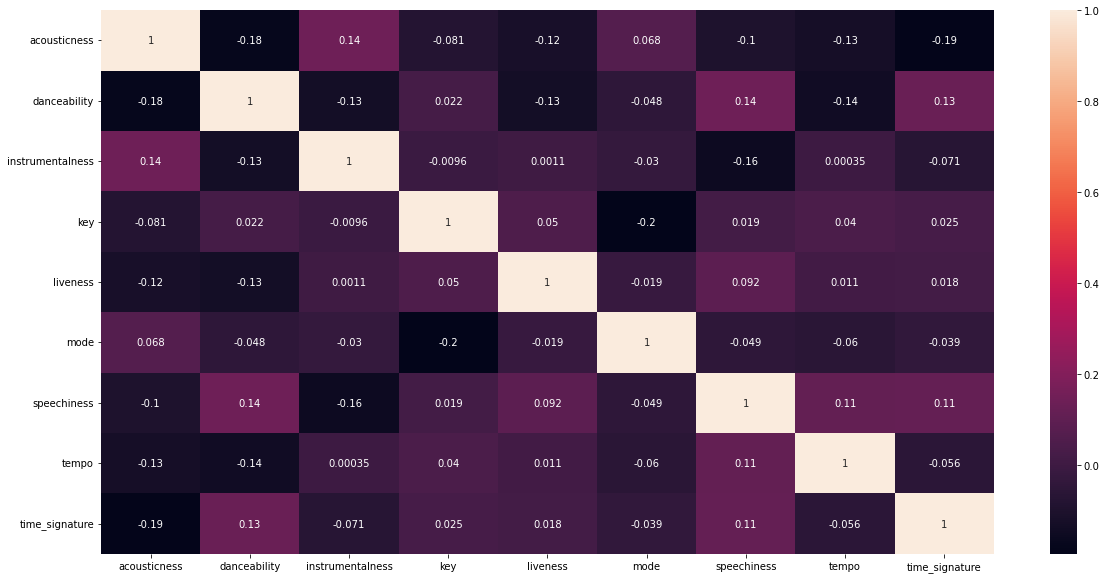

In [20]:
# plot correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True)

# Recommendation System

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

# The working of the K-Means algorithm is explained in the below steps:


Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

In [21]:
from sklearn.cluster import KMeans

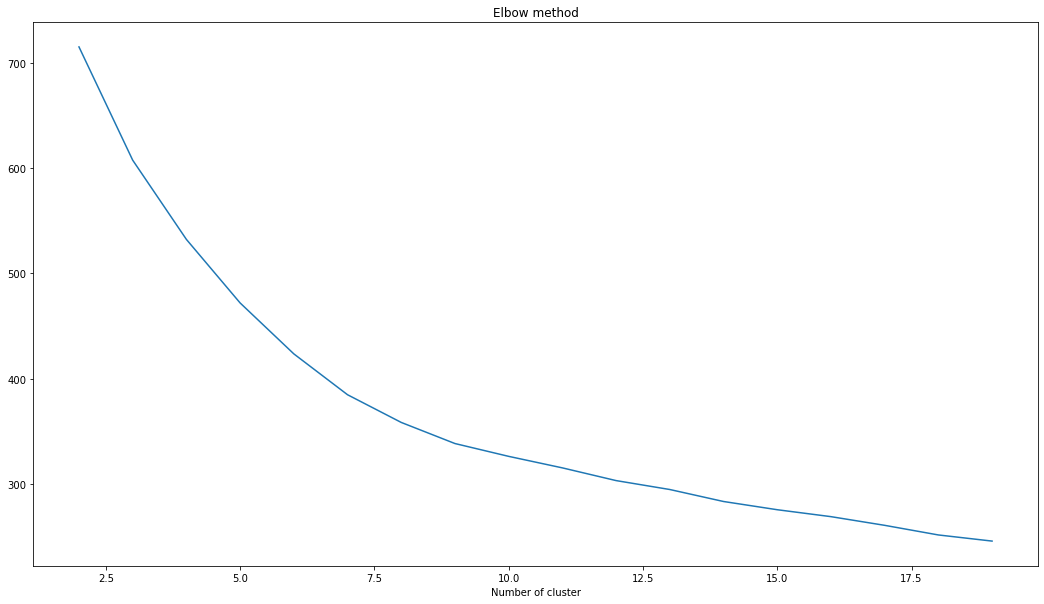

In [22]:
plt.figure(figsize = (18,10))
sse = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k).fit(df1)
    sse.append(kmeans.inertia_)
plt.plot(range(2,20),sse)
plt.title("Elbow method")
plt.xlabel("Number of cluster")
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 10)
cluster = kmeans.fit_predict(df1)
cluster.shape

(2017,)

In [24]:
data_R1 = df1

In [25]:
data_R1["cluster"] = cluster
data_R1


,acousticness,danceability,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,cluster
0,0.010248,0.824826,0.022439,0.181818,0.153862,1.0,0.514441,0.596033,0.75,2
1,0.199998,0.720418,0.006260,0.090909,0.124395,1.0,0.071005,0.654474,0.75,2
2,0.034570,0.830626,0.000240,0.181818,0.147548,1.0,0.335351,0.158539,0.75,2
3,0.607034,0.431555,0.522541,0.454545,0.077247,1.0,0.003784,0.225162,0.75,9
4,0.180902,0.645012,0.524590,0.454545,0.442223,0.0,0.058393,0.735659,0.75,6
...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.002756,0.090909,0.115976,1.0,0.390844,0.158142,0.75,2
2013,0.088138,0.895592,0.001711,0.090909,0.035782,1.0,0.136083,0.362636,0.75,2
2014,0.008610,0.597448,0.004088,0.000000,0.205430,1.0,0.105814,0.596150,0.75,2
2015,0.001645,0.504640,0.693648,0.090909,0.076300,1.0,0.138605,0.595736,0.75,4


In [26]:
data_R1["cluster"].value_counts()

0    438
2    416
7    316
1    289
4    114
3    114
6    103
8     99
5     74
9     54
Name: cluster, dtype: int64

In [27]:
original_data = data
original_data["cluster"] = cluster
original_data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,2
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,2
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,2
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,9
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,6


In [28]:
original_data.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,cluster
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,2
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis,2
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,2
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons,4
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers,0


In [59]:

def recomendation_system(song,amount):
    for i in range(len(original_data)):
        #first we need to check the cluster of song
        if song == original_data.song_title[i]:
            fea = original_data.cluster[i]
            break    
    count=0
    #for getting random song everytime
    ran = list(range(len(original_data)))
    random.shuffle(ran)
    for j in ran:
        rec_fea = original_data.cluster[j]==fea  ##this line is checking other songs having same cluster   
        if rec_fea == True:
            if count < (amount):
                count += 1
                print(original_data.song_title[j])
recomendation_system(song="Candy",amount = 5)

Into Your Arms
There's Nothing Holdin' Me Back
Bad Liar
Fam
I Got U


# Dataset without clustering

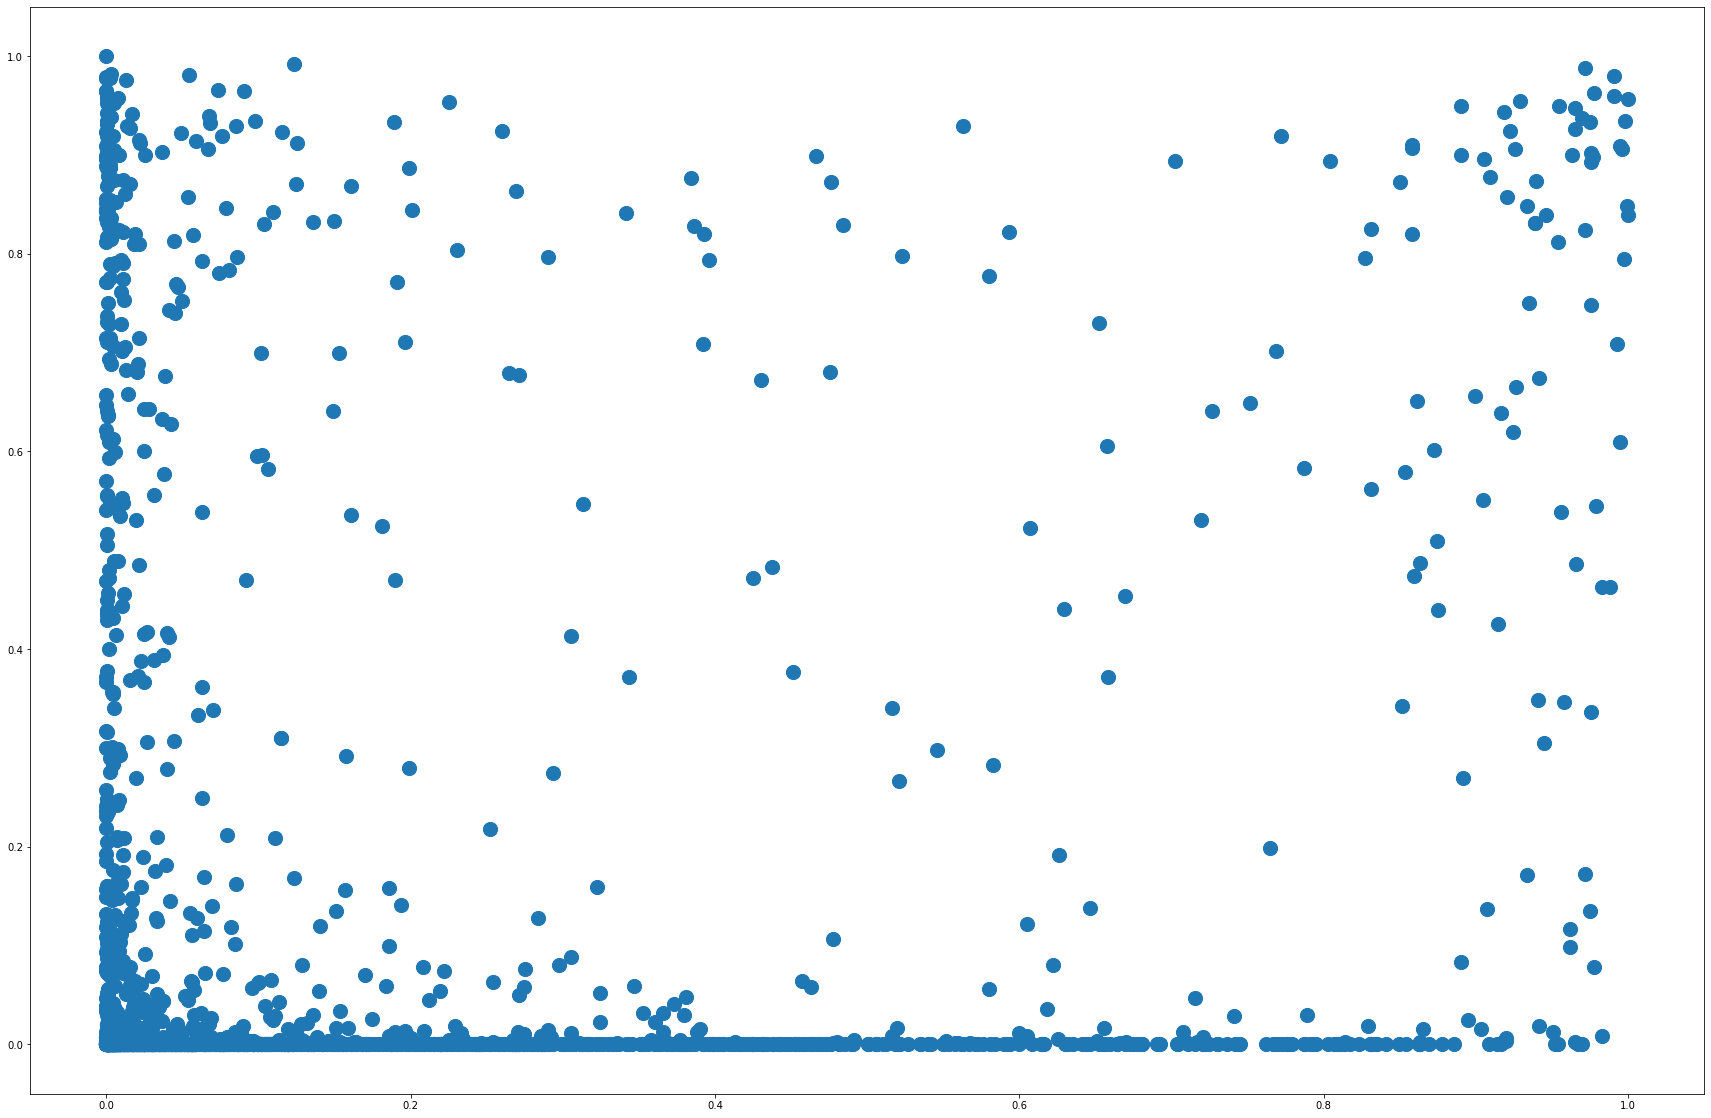

In [60]:
plt.figure(figsize = (30,20))
plt.scatter(y = 'instrumentalness', x = 'acousticness',cmap = "viridis",data = df1,s = 200)
plt.show()

# Dataset with clustering

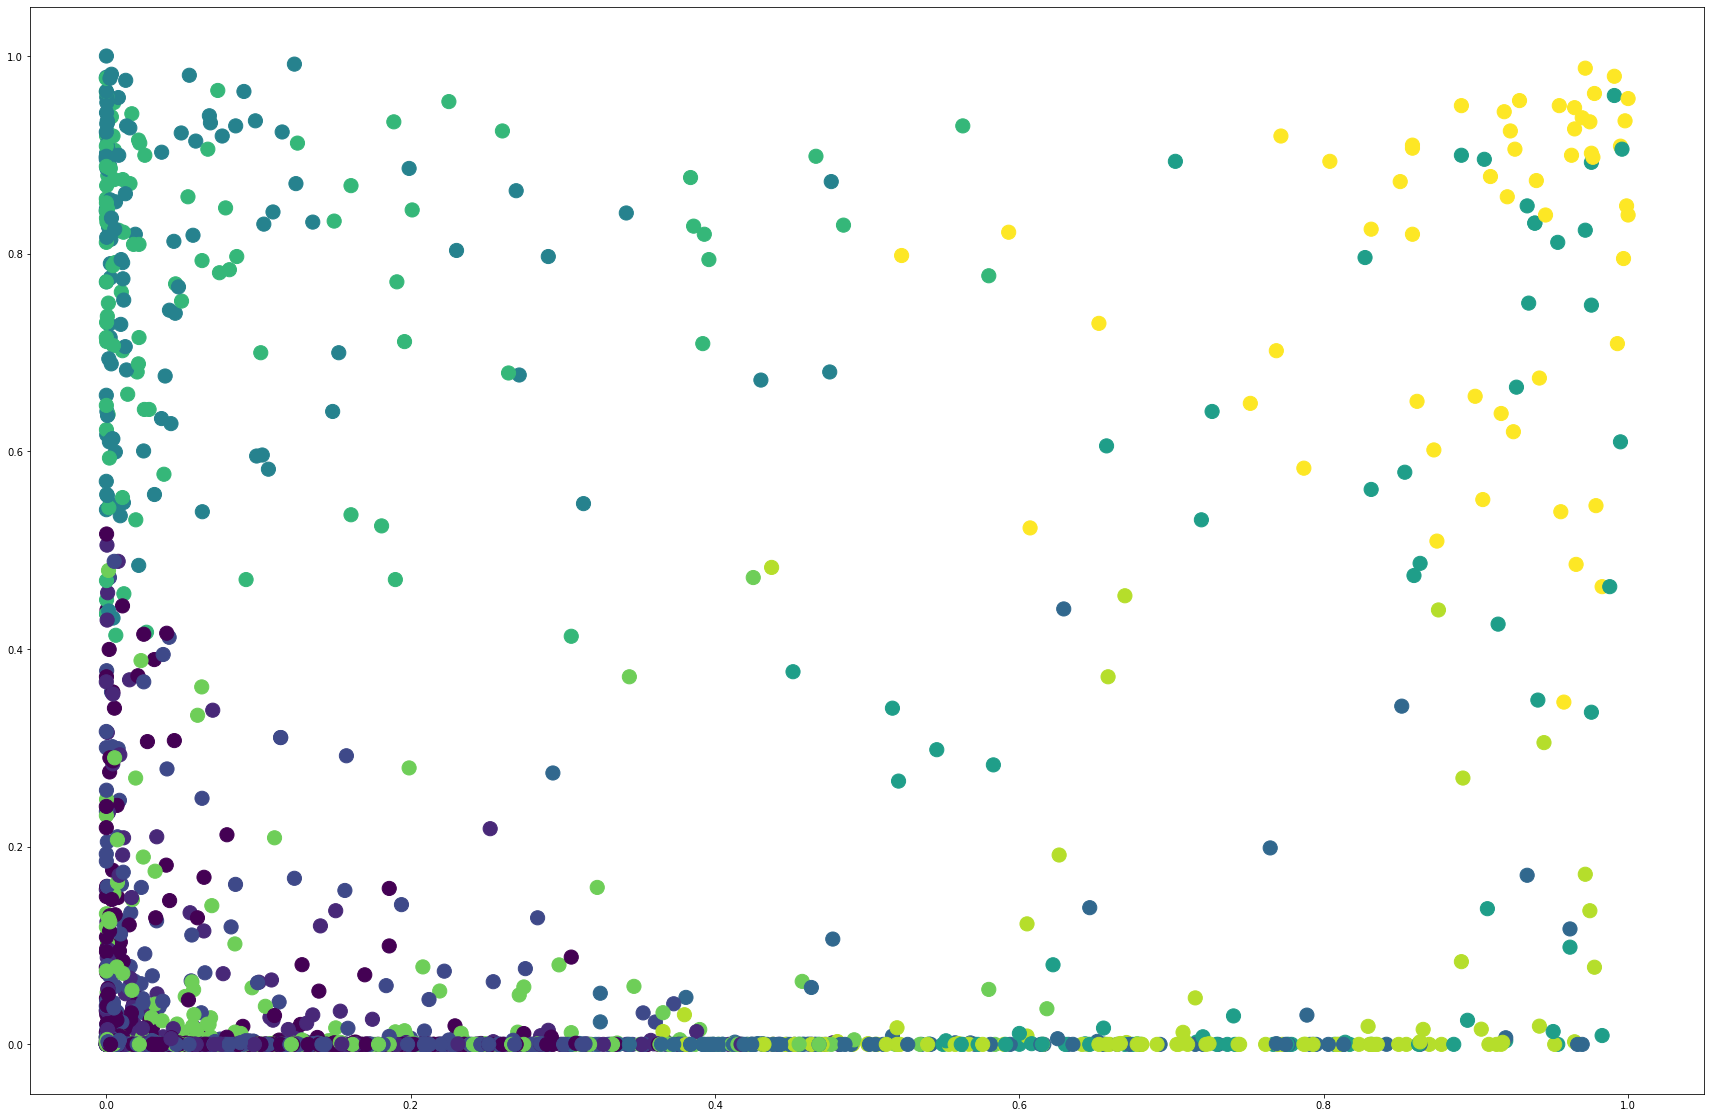

In [62]:
plt.figure(figsize = (30,20))
plt.scatter(y = 'instrumentalness', x = 'acousticness',c = "cluster",cmap = "viridis",data=df1,s = 200)
plt.show()